# Lab 4 — Neural Networks

In this lab, we will explore **Neural Networks**, which can be trained using the **Gradient Descent** algorithm.

Specifically, we will cover the following topics:

1. A brief introduction to the **PyTorch** library for implementing Neural Networks.  
2. Implementation of a neural network using PyTorch.  
3. Discussion on **overfitting** and methods to prevent it.  

For the assignment, we will implement different techniques to prevent overfitting.

---

### Materials for the Lab

1. Course slides on Neural Networks.  
2. PyTorch documentation: [PyTorch Documentation](https://pytorch.org/docs/stable/)  
3. PyTorch tutorials: [PyTorch Tutorials](https://pytorch.org/tutorials/beginner/basics/intro.html)

# 1. Introduction to PyTorch

**PyTorch** is one of the most widely used libraries for developing deep learning models.  

In this section, we will cover the basic concepts of PyTorch and provide further explanations as we progress through the tutorial.  

For this lab, we will use **PyTorch version 2.1.0**.

In [1]:
# you can install torch by using the following command
!pip install torch==2.1.0

You should consider upgrading via the '/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/envs/bayesian-fairness/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
# you can install torchsummary by using the following command
!pip install torchsummary

You should consider upgrading via the '/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/envs/bayesian-fairness/bin/python3.9 -m pip install --upgrade pip' command.


In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [4]:
torch.__version__

'2.1.0'

### Tensors

In PyTorch, we use tensors because they efficiently store data, support GPU acceleration, and enable automatic differentiation for training neural networks.

You can think of tensors as similar to NumPy arrays.

Using tensors, PyTorch can create computational graphs and calculate gradients.

Tensors support various operations, which are listed in the following [link](https://pytorch.org/docs/stable/torch.html#pointwise-ops).  
In addition to the PyTorch operations, we can also apply standard Python operators between tensors.

In [5]:
tensor_1 = torch.tensor([[1., 2.], 
                         [3., 3.]])

tensor_2 = torch.tensor([[1., 0], 
                         [-1., 0]])

In [6]:
print("tensor_1 shape: ", tensor_1.shape)
print("tensor_2 shape: ", tensor_2.shape)

tensor_1 shape:  torch.Size([2, 2])
tensor_2 shape:  torch.Size([2, 2])


In [7]:
elem_mul = tensor_1 * tensor_2
print("Element wise multiplication")
print("Result shape: ", elem_mul.size())
elem_mul

Element wise multiplication
Result shape:  torch.Size([2, 2])


tensor([[ 1.,  0.],
        [-3.,  0.]])

In [8]:
matrix_mul = torch.matmul(tensor_1,tensor_2)
print("Matrix multiplication")
print("Result shape: ", matrix_mul.size())
torch.matmul(tensor_1,tensor_2)

Matrix multiplication
Result shape:  torch.Size([2, 2])


tensor([[-1.,  0.],
        [ 0.,  0.]])

In [9]:
# get tensor as numpy array
tensor_1.data.numpy()

array([[1., 2.],
       [3., 3.]], dtype=float32)

To begin lets define a simple polynomial function.

In [10]:
def f(x):
    """
    A convex function
    f(x) = (x-5)^2
    """
    y = (x-5)**2
    return y

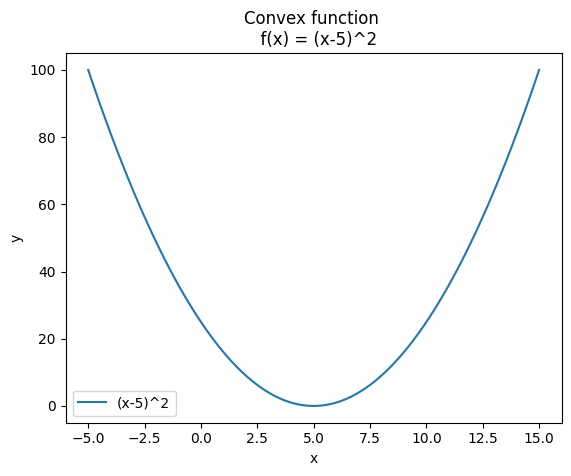

In [11]:
x = torch.linspace(-5, 15, 100)
y = f(x)

plt.figure()
plt.plot(x, y, label = "(x-5)^2")
plt.legend()
plt.title("Convex function \n  f(x) = (x-5)^2")
plt.ylabel("y")
plt.xlabel("x")
plt.show()
plt.close()

# Gradient Decent

**Gradient Descent (GD)** is a iterative method to find a minimum of a **convex function**.

**Gradient descent** is one of the most popular algorithms to perform optimization and by far the most common way to optimize neural networks.

In machine learning, Gradient descent is a way to minimize an objective function whit respect to model’s parameters by updating the parameters in the opposite direction of the gradient of the objective function w.r.t. to the parameters.

<figure>
  <img style="float: left;" src="./figures_set2/Gradiend_descent.png" width="800"/>
</figure>



The above function has the following computational graph

<p align="center">
  <img style="float: left;" src="./figures_set2/Computational_Graph.png" width="500"/>
</p>

The libraries that implement automatic differentiation keep track of the different operation between variables to construct the computational graph.

Having this graph allows us to compute the gradients of complex function.


Having a computational graph we have two main operation:
1. **Forward pass**: calculate the output of the computational graph. In our example the value of f(x)
2. **Backward pass**: calculate the gradients of each node in the computational graph.
   Having the gradients of each node allows us to calculate the final gradient of each node using the chain rule of differentiation.In our example the df/dx.


<p align="center">
  <img style="float: left;" src="./figures_set2/Auto_diff_Computational_Graph.png" width="900"/>
</p>

In [12]:
# create tensors with requires_grad = true in order to indicate pytorch to track the gradients of the tensor.
x = torch.tensor(5.0, requires_grad = True)

# get the output of a function
y = f(x) # forward pass

# Compute gradients using backward function for y
y.backward()

# Access the gradients using x.grad
gradient = x.grad
print("gradient df(x)/dx|(x=5) :", gradient.data.numpy())

gradient df(x)/dx|(x=5) : 0.0


### Implement Gradient Descent
in the following example we will find the minimum of a function using gradient decent.


<figure>
  <img style="float: left;" src="./figures_set2/sgd.png" width="400"/>
</figure>|

In [13]:
x_init= -13.0
step_max = 500
lr = 0.1

# parameters for stoping
thr = 0.0001

function = f

def gradient_decent(function, x_init, lr, step_max, thr):
    x = torch.tensor(x_init, requires_grad = True)
    
    x_history = [x.data]
    step = 0 
    while step < step_max:
        # step 1. Forward pass to get the output
        y = function(x)

        # step 2. Backward pass to calculate the gradient
        y.backward()

        # step 3. Update x to find minimum
        gradient = x.grad.data
        x.data = x.data - lr * gradient
        x.grad.data.zero_() # technical steps, otherwise accumulate the gradients

        # just keep the values of x
        x_history += [x.data]
        step = step +1
        
        # stopping critiria
        if abs(x.data - x_history[-2]) < thr:
            break
    x_history = np.array(x_history)
    return x.data, step, x_history 

In [14]:
x_min, total_steps, x_history = gradient_decent(function = f, 
                                                x_init = -3.0 ,
                                                lr = 0.1,
                                                step_max = 100,
                                                thr = 0.001)

In [15]:
print("Total steps to achive minimum:" , total_steps)
print("Minimum:" , x_min.data.numpy())

Total steps to achive minimum: 35
Minimum: 4.9967546


In [16]:
x_history = np.array(x_history)

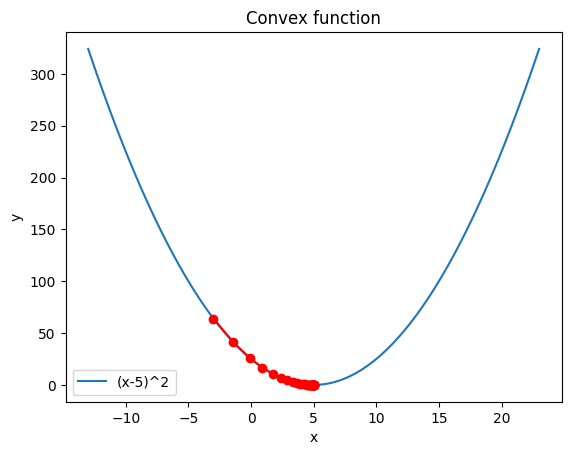

In [17]:
x = np.linspace(-13, 23,100)
# x_history = np.array()
plt.figure()
plt.plot(x, f(x), label = "(x-5)^2")
plt.plot(x_history, f(x_history),marker = "o", color="r")
plt.legend()
plt.title("Convex function")
plt.ylabel("y")
plt.xlabel("x")
plt.show()
plt.close()

# Loading the Adult Dataset

The [Adult dataset](https://archive.ics.uci.edu/dataset/2/adult) is used for a binary classification task.   
The objective is to predict whether an individual's income exceeds $50,000 based on various socio-economic features.

In [18]:
from collections import OrderedDict

data_types = OrderedDict([
    ("age", "int"),
    ("workclass", "category"),
    ("final_weight", "int"),  # originally it was called fnlwgt
    ("education", "category"),
    ("education_num", "int"),
    ("marital_status", "category"),
    ("occupation", "category"),
    ("relationship", "category"),
    ("race", "category"),
    ("sex", "category"),
    ("capital_gain", "float"),  # required because of NaN values
    ("capital_loss", "int"),
    ("hours_per_week", "int"),
    ("native_country", "category"),
    ("income_class", "category"),
])
target_column = "income_class"

In [19]:
def read_dataset(path):
    return pd.read_csv(
        path,
        names=data_types,
        index_col=None,

        comment='|',  # test dataset has comment in it
        skipinitialspace=True,  # Skip spaces after delimiter
        na_values={
            'capital_gain': 99999,
            'workclass': '?',
            'native_country': '?',
            'occupation': '?',
        },
        dtype=data_types,
    )

def clean_dataset(data):
    # Test dataset has dot at the end, we remove it in order
    # to unify names between training and test datasets.
    data['income_class'] = data.income_class.str.rstrip('.').astype('category')

    # Remove final weight column since there is no use
    # for it during the classification.
    data = data.drop('final_weight', axis=1)

    # Duplicates might create biases during the analysis and
    # during prediction stage they might give over-optimistic
    # (or pessimistic) results.
    data = data.drop_duplicates()

    # Binary target variable (>50K == 1 and <=50K == 0)
    data[target_column] = (data[target_column] == '>50K').astype(int)

    # Categorical dataset
    categorical_features = data.select_dtypes('category').columns
    data[categorical_features] = data.select_dtypes('category').apply(lambda x: x.cat.codes)
    return data

In [20]:
# !pip install --upgrade certifi

In [22]:
import pandas as pd
# get and clean train dataset
TRAIN_DATA_FILE = 'data/adult/adult.data'# 'adult/adult.data'
train_data = clean_dataset(read_dataset(TRAIN_DATA_FILE))
train_data = train_data.dropna()
print("Train dataset shape:", train_data.shape)

# get and clean test dataset
TEST_DATA_FILE = 'data/adult/adult.test' #'adult/adult.test'
test_data = clean_dataset(read_dataset(TEST_DATA_FILE))
test_data = test_data.dropna()
print("Test dataset shape:", test_data.shape)

Train dataset shape: (28938, 14)
Test dataset shape: (15175, 14)


In [23]:
target_column = "income_class"
features = train_data.columns.difference([target_column])

In [24]:
train_data

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
0,39,6,9,13,4,0,1,4,1,2174.0,0,40,38,0
1,50,5,9,13,2,3,0,4,1,0.0,0,13,38,0
2,38,3,11,9,0,5,1,4,1,0.0,0,40,38,0
3,53,3,1,7,2,5,0,2,1,0.0,0,40,38,0
4,28,3,9,13,2,9,5,2,0,0.0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,3,12,14,2,3,0,4,1,0.0,0,40,38,1
32555,22,3,15,10,4,10,1,4,1,0.0,0,40,38,0
32556,27,3,7,12,2,12,5,4,0,0.0,0,38,38,0
32558,58,3,11,9,6,0,4,4,0,0.0,0,40,38,0


### Get train/val/test set

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_data[features], train_data[[target_column]], test_size=0.1)
X_test, y_test = test_data[features], test_data[[target_column]]

### Data Scalling

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = features)

X_val = pd.DataFrame(scaler.transform(X_val),columns = features) # note that here we just use the transform method!
X_test = pd.DataFrame(scaler.transform(X_test),columns = features) # note that here we just use the transform method!

In [27]:
X_train.shape, X_val.shape, X_test.shape

((26044, 13), (2894, 13), (15175, 13))

# Neural Networks

Neural Networks are powerful function approximator that archives state-of-the-art performance on a lot of application the last decade on machine learning.

The performance of the Deep Neural Network's is due to their high number of parameters and the efficient learning methods used to train those networks.
For example the gtp-3 languages model was about by 175 billion parameters.

Neural Networks, adjust their **parameters** (training), using the gradient descent method to **minimise a loss function** $L$.

<figure>
  <img style="float: left;" src="./figures_set2/neural_net_new.png" width="800"/>
</figure>|

### Operation of each node

<figure>
  <img style="float: left;" src="./figures_set2/neuron_2.png" width="600"/>
</figure>

# Activation Functions

Activation functions play an integral role in neural networks by introducing non-linearity.
This non-linearity allows neural networks to develop complex representations and functions based on the inputs that would not be possible with a simple linear layers.

Bellow we illustrate some of the most famous activation functions

<figure>
  <img style="float: left;" src="./figures_set2/acitvation_fun.png" width="600"/>
</figure>

# Binary Classification problem

In classification problem the output of the neural network can be probability of each class p(y|x).

So for binary classification we can do that using a single output to indicate the p(y=1|x).  
This has to be bounded between [0,1] in order to be a probability.
To do so we can use the sigmoid function that we can illustrate bellow.

<figure>
  <img style="float: left;" src="./figures_set2/sigmoid.png" width="400"/>
</figure>

# Define Neural Network with pytorch

We will implement a simple neural network for classification problem with pytorch.  
The following network has 2 hidden layers following by an output layer.

In [28]:
class NeuralNetwork(torch.nn.Module):
    """
    Simple two layer neural network for regression
    """
    def __init__(self, num_input_features):
        super().__init__()
        
        # layer 1
        layer_1_units = 200
        self.layer_1 = torch.nn.Linear(in_features=num_input_features,
                                       out_features=layer_1_units)
        self.activation_1 = torch.nn.ReLU()
        
        # layer  2
        layer_2_units = 100
        self.layer_2 = torch.nn.Linear(in_features=layer_1_units,
                                       out_features=layer_2_units)
        self.activation_2 = torch.nn.ReLU()
        
        # layer output layer
        self.out_layer = torch.nn.Linear(in_features=layer_2_units,
                                         out_features=1)
        self.out_activation= torch.nn.Sigmoid()

    def forward(self, x):
        x_1 = self.activation_1( self.layer_1( x ) )
        x_2 = self.activation_2( self.layer_2( x_1 ) )
        output = self.out_activation(self.out_layer(x_2))
        return output

In [30]:
from torchsummary import summary
model = NeuralNetwork(num_input_features=12)
summary(model, input_size= [[12]])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 200]           2,600
              ReLU-2                  [-1, 200]               0
            Linear-3                  [-1, 100]          20,100
              ReLU-4                  [-1, 100]               0
            Linear-5                    [-1, 1]             101
           Sigmoid-6                    [-1, 1]               0
Total params: 22,801
Trainable params: 22,801
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.09
Estimated Total Size (MB): 0.09
----------------------------------------------------------------


### make predictions

In [31]:
x = torch.rand((100,12))
                  
predicted_proba = model.forward(x)

In [32]:
predicted_proba.shape # p(y=1|x)

torch.Size([100, 1])

In [33]:
predicted_proba

tensor([[0.5187],
        [0.5238],
        [0.5241],
        [0.5315],
        [0.5223],
        [0.5208],
        [0.5280],
        [0.5358],
        [0.5206],
        [0.5183],
        [0.5207],
        [0.5285],
        [0.5263],
        [0.5204],
        [0.5277],
        [0.5251],
        [0.5224],
        [0.5175],
        [0.5171],
        [0.5235],
        [0.5217],
        [0.5241],
        [0.5246],
        [0.5267],
        [0.5353],
        [0.5279],
        [0.5219],
        [0.5359],
        [0.5308],
        [0.5184],
        [0.5353],
        [0.5323],
        [0.5254],
        [0.5304],
        [0.5311],
        [0.5286],
        [0.5320],
        [0.5245],
        [0.5255],
        [0.5278],
        [0.5288],
        [0.5261],
        [0.5259],
        [0.5336],
        [0.5163],
        [0.5278],
        [0.5290],
        [0.5153],
        [0.5264],
        [0.5286],
        [0.5330],
        [0.5328],
        [0.5167],
        [0.5207],
        [0.5289],
        [0

In [34]:
# make predictions
thr = 0.5
predictions = (predicted_proba > thr) * 1
predictions

tensor([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],

# Optimize Network

We seek the parameters that **minimize the loss function** by iteratively updating them in the direction that reduces the loss.  

To optimize the network, we use a **variant of gradient descent**, a first-order optimization algorithm that adjusts the model parameters based on the gradient of the loss function with respect to each parameter. At each iteration $t$, the update rule is given by  

$$
w_{t+1} = w_t - \eta \nabla_{w} \mathcal{L}(w_t),
$$

where $ \eta $ is the **learning rate**, controlling the step size of the updates, and $ \nabla_{\theta} \mathcal{L}(\theta_t)$ denotes the gradient of the loss function with respect to $ \theta_t$.  


![Optimization surface](./figures_set2/surface.png)

#### Loss — Binary Cross-Entropy

We use the **binary cross-entropy loss** as the loss function, which measures the difference between the predicted probabilities and the true binary labels. It is defined as  

$$
\mathcal{L}_{\text{BCE}} = - \frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i) \right],
$$

where $y_i \in \{0,1\}$ denotes the true label and $\hat{y}_i \in [0,1]$ is the predicted probability for sample $i$.




Where
$$\hat{y} = f(x) = p(y=1|x)$$

##### Bellow we perfom a single iteration of sgd.

In [35]:
model = NeuralNetwork(num_input_features=12)
loss_fn = torch.nn.BCELoss()

# to make the optimization pytorch has different optimizers. 
lr = 1.1
optimizer = torch.optim.SGD(model.parameters(), lr=lr) # there are different options for optimizers

In [36]:
model.layer_2.weight

Parameter containing:
tensor([[-0.0698, -0.0701,  0.0612,  ..., -0.0482,  0.0134, -0.0243],
        [ 0.0363,  0.0704,  0.0161,  ..., -0.0690, -0.0647, -0.0624],
        [-0.0144, -0.0686, -0.0210,  ..., -0.0370, -0.0214,  0.0306],
        ...,
        [-0.0102,  0.0281, -0.0432,  ..., -0.0241,  0.0556, -0.0367],
        [-0.0097, -0.0387,  0.0497,  ..., -0.0473,  0.0435,  0.0500],
        [-0.0664, -0.0642, -0.0248,  ...,  0.0707,  0.0506, -0.0257]],
       requires_grad=True)

In [37]:
x = torch.rand((100, 12))
y = torch.randint(0, 1, (100, 1), dtype = torch.float)
                  
predicted_proba = model.forward(x)
loss = loss_fn(predicted_proba, y)
                  
loss.backward()
optimizer.step() # The optimiser automaticaly update the weights using the gradients.

optimizer.zero_grad() # reset the gradients

In [39]:
model.layer_2.weight

Parameter containing:
tensor([[-0.0698, -0.0701,  0.0612,  ..., -0.0482,  0.0134, -0.0243],
        [ 0.0220,  0.0704,  0.0161,  ..., -0.0907, -0.0658, -0.0624],
        [-0.0144, -0.0686, -0.0210,  ..., -0.0370, -0.0214,  0.0306],
        ...,
        [-0.0190,  0.0281, -0.0432,  ..., -0.0362,  0.0549, -0.0368],
        [-0.0097, -0.0387,  0.0497,  ..., -0.0473,  0.0435,  0.0500],
        [-0.0664, -0.0642, -0.0248,  ...,  0.0706,  0.0506, -0.0257]],
       requires_grad=True)

# Training Loop

When training a neural network, we typically use **mini-batches** of training examples instead of feeding the entire dataset at once.  

<figure>
  <img style="float: left;" src="./figures_set2/batches.png" width="500"/>
</figure>

Batch training is used for several reasons:

- Large datasets often **cannot fit entirely into memory**.  
- Using batches allows for **faster training**, as multiple updates to the model weights can be performed in the same amount of time.  
- It can also improve **stability** by smoothing the noise in gradient estimates.  

However, there are also trade-offs. Since the gradient is computed over a small subset of data, it only approximates the true gradient direction. Therefore, **very small batch sizes** may lead to unstable updates and poorer generalization.  

The **batch size** is thus an important **hyperparameter** of the training algorithm that affects both performance and convergence speed.

<figure>
  <img style="float: left;" src="./figures_set2/train_loop.png" width="500"/>
</figure>

lets use pytorch to batch our data. 

In summary PyTorch provides two main data classes: **DataLoader** and **Dataset** to handle your data. 

**Dataset**  stores the samples and their corresponding labels, and **DataLoader** wraps an iterable around the Dataset to enable easy access to the batches.

you can read more at: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [37]:
# covert data into tensors
train_x_tensor = torch.tensor(X_train.values, dtype=torch.float)
train_y_tensor = torch.tensor(y_train.values, dtype=torch.float)

# use the dataset class wrapper for tensors
train_tensor_dataset = torch.utils.data.TensorDataset(train_x_tensor, train_y_tensor)# there are more coplex dataset
                                                                                     # i.e images or text data

# pass the dataset class into Dataloader to batch and shuffle your data
train_dataloader = torch.utils.data.DataLoader(train_tensor_dataset,
                                               batch_size=64,
                                               shuffle=True)

In [38]:
for i, batch in enumerate(train_dataloader):
    batch_x, batch_y = batch # get next iteam

In [39]:
batch_x.shape

torch.Size([60, 13])

In [40]:
# convert val data to tensor for later
val_x_tensor = torch.tensor(X_val.values, dtype=torch.float)
val_y_tensor = torch.tensor(y_val.values, dtype=torch.float)

In [41]:
val_x_tensor

tensor([[ 2.0286, -0.2449, -0.2316,  ..., -0.2905, -1.3984, -1.2550],
        [ 1.1521, -0.2449, -0.2316,  ..., -0.9072,  0.7151,  0.0823],
        [-0.8930, -0.2449, -0.2316,  ..., -0.9072,  0.7151,  0.0823],
        ...,
        [-0.4548, -0.2449, -0.2316,  ..., -0.2905,  0.7151,  1.4197],
        [ 0.0565, -0.2449, -0.2316,  ..., -0.2905,  0.7151,  0.0823],
        [-1.4043, -0.2449, -0.2316,  ...,  0.9428, -1.3984,  0.0823]])

# Define training loop


<figure>
  <img style="float: left;" src="./figures_set2/train_loop.png" width="400"/>
</figure>

In [42]:
def training_step(model, input_data, optimizer, loss_fn):
    # reset gradients of the optimizer
    optimizer.zero_grad()
    
    # unfold data
    x_batch, y_batch = input_data
    
    # get predictions
    y_pred_propa = model.forward(x_batch)
    
    # calculate loss
    loss = loss_fn(y_pred_propa, y_batch)

    # compute gradients 
    loss.backward()
    
    # optimise network
    optimizer.step()
    
    # compute metrics for monitoring
    with torch.no_grad(): 
        y_pred = (y_pred_propa>0.5) * 1
    train_acc = torch.sum(y_pred == y_batch) / y_batch.shape[0]

    return loss.data.numpy(), train_acc.data.numpy()

In [43]:
def evaluation_step(model, input_data, loss_fn):
    # when we use torch.no_grad pytorch didnt store information
    # that is required to calculate gradients so is fasterr 
    with torch.no_grad(): 
        x_batch, y_batch = input_data
        y_pred_proba = model(x_batch)
    loss = loss_fn(y_pred_proba, y_batch)

    # compute metrics
    y_pred = (y_pred_proba>0.5) * 1
    acc = torch.sum(y_pred == y_batch) / y_batch.shape[0]
    return loss.data.numpy(), acc.data.numpy()

In [44]:
model = NeuralNetwork(num_input_features=13)

lr = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
loss_fn = torch.nn.BCELoss() # binary cross entropy

In [45]:
# parameters of the training loop
epochs = 400

In [46]:
# -------------------- Train  Loop----------------------------
train_history = []
val_history = []
for epoch in range(epochs): # iterate over epoch    
    # -------------------- 1. Training on each epoch ----------------------------
    accumulated_loss,accumulated_accuracy = 0, 0 # monitor loss and metrics during training
    for step, batch_data in enumerate(train_dataloader): # iterate over batch
        loss, accuracy = training_step(model,batch_data,optimizer,loss_fn) # train model using a single batch
        accumulated_loss = (step * accumulated_loss + loss)/(step+1)
        accumulated_accuracy =  (step * accumulated_accuracy + accuracy)/(step+1)
        
    # store the loss and the metrics at the end of each epoch
    train_history += [{"loss":accumulated_loss, "accuracy":accumulated_accuracy, "epoch": epoch}]
    
    # -------------------- 2. Monitor Error on Validation set ----------------------------
    val_loss, val_accuracy = evaluation_step(model, (val_x_tensor, val_y_tensor), loss_fn)
    val_history += [{"loss":val_loss, "accuracy":val_accuracy, "epoch": epoch}]
    
    # -------------------- 3. Display Performance every several epochs ----------------------------
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}:  loss:{accumulated_loss:.3f}, accuracy-:{accumulated_accuracy:.3f}, val_loss:{val_loss:.3f}, val_accuracy->{val_accuracy:.3f}")

Epoch 0/400:  loss:0.462, accuracy-:0.790, val_loss:0.404, val_accuracy->0.811
Epoch 10/400:  loss:0.334, accuracy-:0.843, val_loss:0.333, val_accuracy->0.832
Epoch 20/400:  loss:0.327, accuracy-:0.847, val_loss:0.326, val_accuracy->0.836
Epoch 30/400:  loss:0.322, accuracy-:0.848, val_loss:0.323, val_accuracy->0.837
Epoch 40/400:  loss:0.319, accuracy-:0.850, val_loss:0.322, val_accuracy->0.838
Epoch 50/400:  loss:0.316, accuracy-:0.850, val_loss:0.320, val_accuracy->0.842
Epoch 60/400:  loss:0.312, accuracy-:0.851, val_loss:0.320, val_accuracy->0.841
Epoch 70/400:  loss:0.309, accuracy-:0.854, val_loss:0.319, val_accuracy->0.848
Epoch 80/400:  loss:0.307, accuracy-:0.855, val_loss:0.318, val_accuracy->0.844
Epoch 90/400:  loss:0.303, accuracy-:0.857, val_loss:0.319, val_accuracy->0.842
Epoch 100/400:  loss:0.301, accuracy-:0.857, val_loss:0.317, val_accuracy->0.842
Epoch 110/400:  loss:0.298, accuracy-:0.860, val_loss:0.321, val_accuracy->0.843
Epoch 120/400:  loss:0.295, accuracy-:0

In [40]:
val_history_df = pd.DataFrame(val_history)
train_history_df = pd.DataFrame(train_history)

NameError: name 'val_history' is not defined

#  Overfitting

**Overfitting** refers to the phenomenon when our model performs well on the training set but exhibits poor performance on the testing set.

Since neural networks have a large number of parameters can memories the examples, resulting in bad performance during testing.  

This occurs when the model exploits pattern between the data (X) and the labels (Y) that is not in the testing data.

<figure>
  <img style="float: left;" src="./figures_set2/overfiting.jpg" width="800"/>
</figure>

### Learning Curves

One way to prevent overfiting is to monitor the performance of our algorithm on the validation set.

Learning curves track the performance of the model during training by measuring various metrics at regular optimization steps.   

Learning curves provide valuable insights into the model's behavior, allowing us to detect overfitting.

To identify overfitting, we typically compare the learning curves of the training and validation sets.

<figure>
  <img style="float: left;" src="./figures_set2/epoch-error-curve-fitting.png" width="400"/>
</figure>

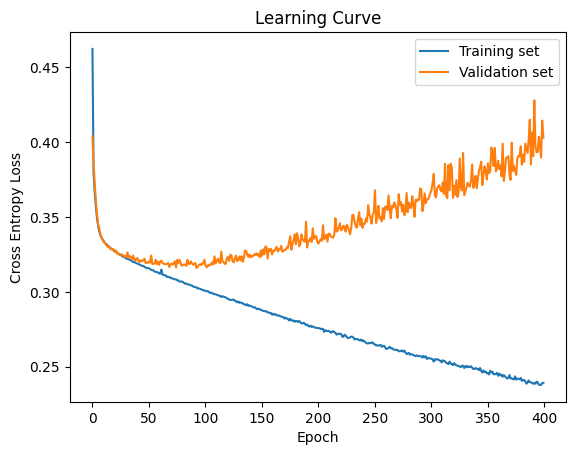

In [48]:
plt.figure()
plt.plot(train_history_df["epoch"],train_history_df["loss"], label = "Training set")
plt.plot(val_history_df["epoch"],val_history_df["loss"], label = "Validation set")
plt.title("Learning Curve")
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Epoch")
plt.legend()

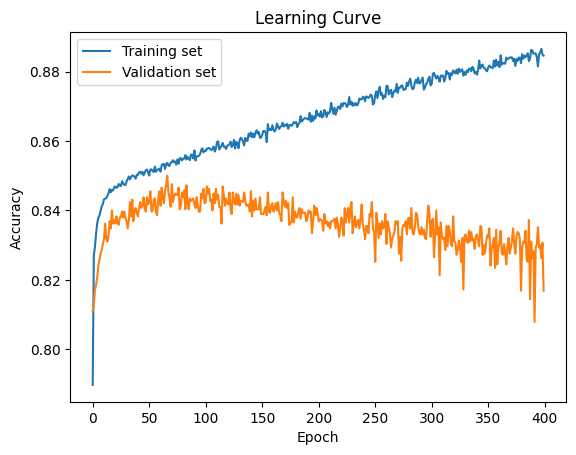

In [49]:
plt.figure()
plt.plot(train_history_df["epoch"],train_history_df["accuracy"], label = "Training set")
plt.plot(val_history_df["epoch"],val_history_df["accuracy"], label = "Validation set")
plt.title("Learning Curve")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()

# Assignment

In this assignment, we will explore the effects of different techniques to **reduce overfitting** when training a neural network.  

The techniques we will study are:

1. **Early Stopping**  
2. **Reducing Model Parameters**  
3. **Weight Regularization**

# A. Early Stopping

**Early stopping** is an optimization technique used to reduce overfitting without compromising model accuracy. The main idea is to **stop training before the model starts to overfit**.  

To use early stopping, we monitor the **validation loss**. If it stops improving for several consecutive epochs, as defined by the **patience** parameter, training is stopped.

**Steps:**

1. **Implement Early Stopping**  
   - Stop training after the model does not improve the validation loss for `patience` consecutive epochs.  
   - Restore the **best weights** observed during training.  

2. **Train your model using early stopping**.  

3. **Set the best weights** after training stops.  

4. **Experiment with different `patience` values**, for example `patience = {5, 100}`.  
   - How does the `patience` parameter affect the learning and generalization of your network?  
   - What do you observe in the training and validation curves?

# Solution

In [3]:
# -------------------- Train  Loop----------------------------
def train_loop(patient, epochs, model, optimizer, loss_fn):

    train_history = []
    val_history = []
    for epoch in range(epochs): # iterate over epoch    
        # -------------------- Training on each epoch ----------------------------
        

        # -------------------- Monitor Error Validation set ----------------------------
      

        # -------------------- Early Stoping ----------------------------
        

    return model, val_history_df, train_history_df, best_loss, best_epoch, best_weights

IndentationError: expected an indented block (1790393654.py, line 16)

# B. Reduce the Size of the Network

The **capacity** (total number of parameters) of a model affects the training process. If the model has too many parameters relative to the complexity of the problem, it can easily **overfit** the training data.  

To address this, you can **reduce the total number of parameters** by decreasing the number of units in each layer, and then observe the effect on training and validation performance.

**Steps:**

1. Reduce the size of the network by lowering the number of units in each layer. For example, use **60 units** for the first layer and **20 units** for the second layer.  
2. Train your model **without early stopping**.  
3. Compare the **learning curve** of this smaller model with that of the larger model trained without early stopping (from the "Learning Curves and Overfitting" section).  

# Solution

In [2]:
class NeuralNetworkSmall(torch.nn.Module):
    """
    Simple two layer neural network for regression
    """
    def __init__(self, num_input_features):
        super().__init__()
        # define your network
        


NameError: name 'torch' is not defined

# C. Weight Regularization

**Weight regularization** is a widely used technique to reduce overfitting. 

The main idea is to **add a constraint to the loss function** that keeps the model's weights small.  

Intuitively, weight regularization discourages the model from fitting the training data too closely, forcing it to focus on the most important features. By constraining the weights, the model can **generalize better** to new data, as it is less likely to memorize the training examples and more likely to capture underlying patterns and relationships.  

You can also think of small weights (for example, zero) as a way to deactivate parts of the model, effectively creating a smaller network.

A common and simple form of regularization is **L2 regularization**, where the loss function is modified as follows:

$$
\text{Total Loss} = \mathbb{E}_{x,y \sim P_{\text{data}}} \big[ \text{loss}(f_w(x),y) \big] + \lambda \sum_{j=1}^{p} w_j^2
$$

where:  
- $\lambda$ is the **regularization strength** (scaling parameter),  
- $w_j$ are the **model parameters**,  
- $p$ is the total number of parameters, and  
- $\text{loss}(\cdot)$ is the original loss function.  

In PyTorch, **L2 regularization** can be easily applied using the `weight_decay` parameter of the optimizer. For example:  



```python
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.01)


**Steps:**

1. Use $\lambda = 0.01$ and train your model using **L2 regularization**, as explained before.  
   Use the "big" model architecture with the **most parameters** (the same with step A) and **do not apply early stopping** to observe the effect.  

2. Compare the results with the **initial training without early stopping** (from the "Learning Curves and Overfitting" section) and comment on the differences in the learning curves and generalization performance.

# Solution

# C. Test set perfomance

mesure the accuracy of the different models on the test set you create before.

Make sure you normalise you data using the "scaler" we define at the begining of the notebook.

In [6]:
# step 1. select data point from test set

# step 2. use scaler to transform

# step 3. transform datat to tensor

# step 4. get the predicted propabilities

# step 5. get predictions from propabilities


# step 6. get accuracy

print(f'Test Accuracy: {accuracy}')

NameError: name 'accuracy' is not defined

## Additional Tips

Some useful guidelines for the projects:

- The **learning rate** typically ranges between **1e-5** and **1e-3**.  
- As an **activation function** in intermediate layers, **ReLU** is a good choice.  
- The **size of the network** depends on the complexity of the problem.  
- For a fixed problem, it is recommended to start with a relatively **small network** and gradually increase its size to check whether it improves performance.  
- For optimizers, **Adam** is a good option as it adapts the learning rate during training.

---

### Data Preprocessing

- **Normalize** input features (e.g., standardize to zero mean and unit variance).  
- For images, **rescale pixel values** to \([0, 1]\) or \([-1, 1]\).  
- **Shuffle and split** data into training, validation, and test sets.  
- **Remove outliers**, as they can negatively affect model convergence.

---

### Training and Regularization

- Use **batch normalization** to stabilize and accelerate training.  
- Consider **weight decay (L2 regularization)** when using optimizers like Adam or SGD.  
- Larger networks are **more likely to overfit**, so use regularization techniques such as dropout or early stopping.  
- Always apply **early stopping** based on the validation loss to prevent overfitting.  

---

### 1. Multi-Class Classification

Used when the model needs to predict one label among multiple classes.

1. The output layer must have **as many neurons as the number of classes**.  
2. Use the **softmax activation function** in the output layer.  
3. The loss function should be **Cross-Entropy**.

---

### 2. Regression

Used when the model predicts a **continuous value** based on input features.

1. The output layer usually has **one neuron**.  
2. Use a **linear activation function** (i.e., no activation).  
3. The loss function is typically the **Mean Squared Error (MSE)**.
